# Fishing the Phish
*Integrative Team Project - IS Team 16 AY22*

# **1. Background**
This notebook is a continuation of the notebook available at [link](link).

In the previous notebook, the flow was as such:

1. Cluster based on source codes of phishing websites
2. Predict the cluster of a new phishing website based on its source code

However, this approach has an underlying issue in utility, that is, source codes of phishing websites are not readily available.
This restricts the predictions to only phishing websites of which their source codes are readily available.

As such, the team has developed an alternative hybrid method for prediction, whereby we retaining the original clustering methodology, but change the prediction methodology. 

For comparison:

**[Original]**
1. Cluster based on source codes of phishing websites
2. Predict the cluster of a new phishing website based on its source code

**[Flow Change]** 
1. Cluster based on source codes of phishing websites (same as original)
2. **Extract features** from the phishing websites
3. With these features, **[use K-Nearest Neighbours (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)** to predict the cluster.

![Original Vs Alternate Method Flowchart](https://github.com/JustAyce/ITPTEAM16/blob/main/images/og_vs_alt_comparison_flow.png?raw=true)

# **2. Features**
As highlighted in the previous section, this alternative method extracts features from the phishing websites, before using [K-Nearest Neighbours (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to predict the clusters of new websites, however, based on its features instead of its source code. These features are not random features, but features that have been commonly used to identify phishing websites.

This section details the features extracted. 

| Feature | Description | Return Value |
| ------- | ----------- | ------------ |
| Suspicious Keywords | With a self-made wordlist of suspicious keywords, we identify the number of suspicious keywords on the website. <br> Examples of suspicious keywords include: "Urgent", "Now", "Locked". | len(sus_kw) | 
| Hyperlinks Count | The total number of hyperlinks on the website. | len(hyperlinks) |
| External & Empty Hyperlinks Count | The number of: <br> 1. Empty Hyperlinks ('#') <br> 2. External Hyperlinks | len(ext_empty_hyperlinks_count) |
| Image Count | The number of images on the website. | len(image_count)
| Image External Request URL Count | The number of images on the website that are loaded from external resources. | len(img_external_request_url_count) |
| External Favicon | Whether the website loads its favicon from an external resource. | True: 1 <br> False: 0 |
| Domain not in Title | Whether the domain is in the website's title. | True: 1 <br> False: 0 |
| IDN homograph | Whether the url of the website contains deceiving words. For more information, see [IDN Homograph attack](https://en.wikipedia.org/wiki/IDN_homograph_attack) | True: 1 <br> False: 0 |
| Number of subdomains | The number of subdomains in the url. | len(subdomains) |
| TLD in subdomain | Whether the subdomains of the url contain TLDs, such as com, net. List of TLDs is obtained from [IANA](https://data.iana.org/TLD/tlds-alpha-by-domain.txt) | True: 1 <br> False: 0 | 
| Length of URL | Whether the length of the url exceeds 54. | True: 1 <br> False: 0 |
| Hyphen Count | The number of hyphens in the url. | len(hyphen_len) | 
| Typosquatted URL | Whether the url contains typosquatted words. For detection, we calculate Jarowinkler distance against a list of top 500 brand names. | For more information, see [Typosquatting](https://en.wikipedia.org/wiki/Typosquatting) | True: 1 <br> False: 0 |
| Special Char | Whether the url contains special characters such as: '@', '!', '#' | True: 1 <br> False: 0 |
| Fake WWW | Whether the url contains 'www' in its domain and/or subdomains. | True: 1 <br> False: 0 |
| Gibberish URL | Whether the url is gibberish. Utilising [Nostril](https://github.com/casics/nostril). | True: 1 <br> False: 0 |

# **3. The Data**
The features extraction code is available on the project's [GitHub Repository](https://github.com/JustAyce/ITPTEAM16/tree/main/features_analyser)

The CSV used in this notebook can be obtained from the project's [Google Drive](https://drive.google.com/drive/folders/1ItSFvYVwbW8JXj4sb6OJ3o8n1AVpA6VS?usp=sharing)

Ensure that the files are placed in file paths as shown below.
To download:

**CSV**
1. csvs/cluster_with_features.csv

# **3.1. Pre-requisites**
Ensure the above.

Installing the required python libraries.

In [ ]:
!pip install -r https://raw.githubusercontent.com/JustAyce/ITPTEAM16/main/requirements.txt

# **4. Predicting with K-Nearest Neighbours (KNN)**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import statistics

# **4.1. Loading the dataset**
Here, the csv containing the features is loaded.

In [2]:
# Loading the dataset
csv_folder = r'csvs'
csv_filename = 'cluster_with_features.csv'
dataset = pd.read_csv(os.path.join(csv_folder, csv_filename))

# Obtaining feature columns and its labels
X = dataset.iloc[:, 8:].values
y = dataset.iloc[:, 7].values

# **4.2. Split the dataset into Training and Test Set**
Here, we split the dataset into Training and Test set, with a test size of 0.20

We set a random_state of 0.

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

# **4.3: Train the K-NN Model on the Training Set**
Here, we use the training set obtained from the split to train the K-NN Model.

In [26]:
# It is suggested that the n_neighbours for K-Nearest Neighbours (KNN) 
# to be the square root of the number of samples i.e., length of the dataset
neighbours = int(math.sqrt(len(X_train)))

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = neighbours, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

# **4.4: Predict the Test Set Results**
Here, we predict the results of the test set obtained from the split with the trained K-NN Model.

From the prediction, we extract the following analytics:

1. Confusion Matrix
2. Accuracy Score

Accuracy of this state: 0.6818181818181818


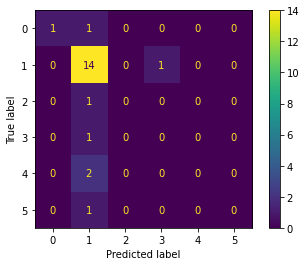

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

# Display Accuracy
print(f'Accuracy of this state: {ac}')

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# **4.5: Iteration**
Here, we perform 100 iterations of prediction. In train_test_split, the random_state changes from 0-100, and the accuracy score is stored into a list.

With this, we can obtain the least optimistic, most optismitic and the average accuracy of the prediction.

In [28]:
# Brute force random_state
accuracy = []
for i in range(0, 100):
  sc = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=i)
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  classifier = KNeighborsClassifier(weights = 'distance', n_neighbors = 9, metric = 'minkowski', p = 2)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  ac = accuracy_score(y_test, y_pred)
  accuracy.append(ac)


print(f'Min Acc: {min(accuracy)}')
print(f'Max Acc: {max(accuracy)}')
print(f'Avg Acc: {statistics.mean(accuracy)}')

Min Acc: 0.36363636363636365
Max Acc: 0.8636363636363636
Avg Acc: 0.7022727272727273


# **5: Conclusion**

With this method, it enhances the utility and usability of the project, allowing us to predict the cluster of a phishing website with either its source code, or its features that are more readily available.